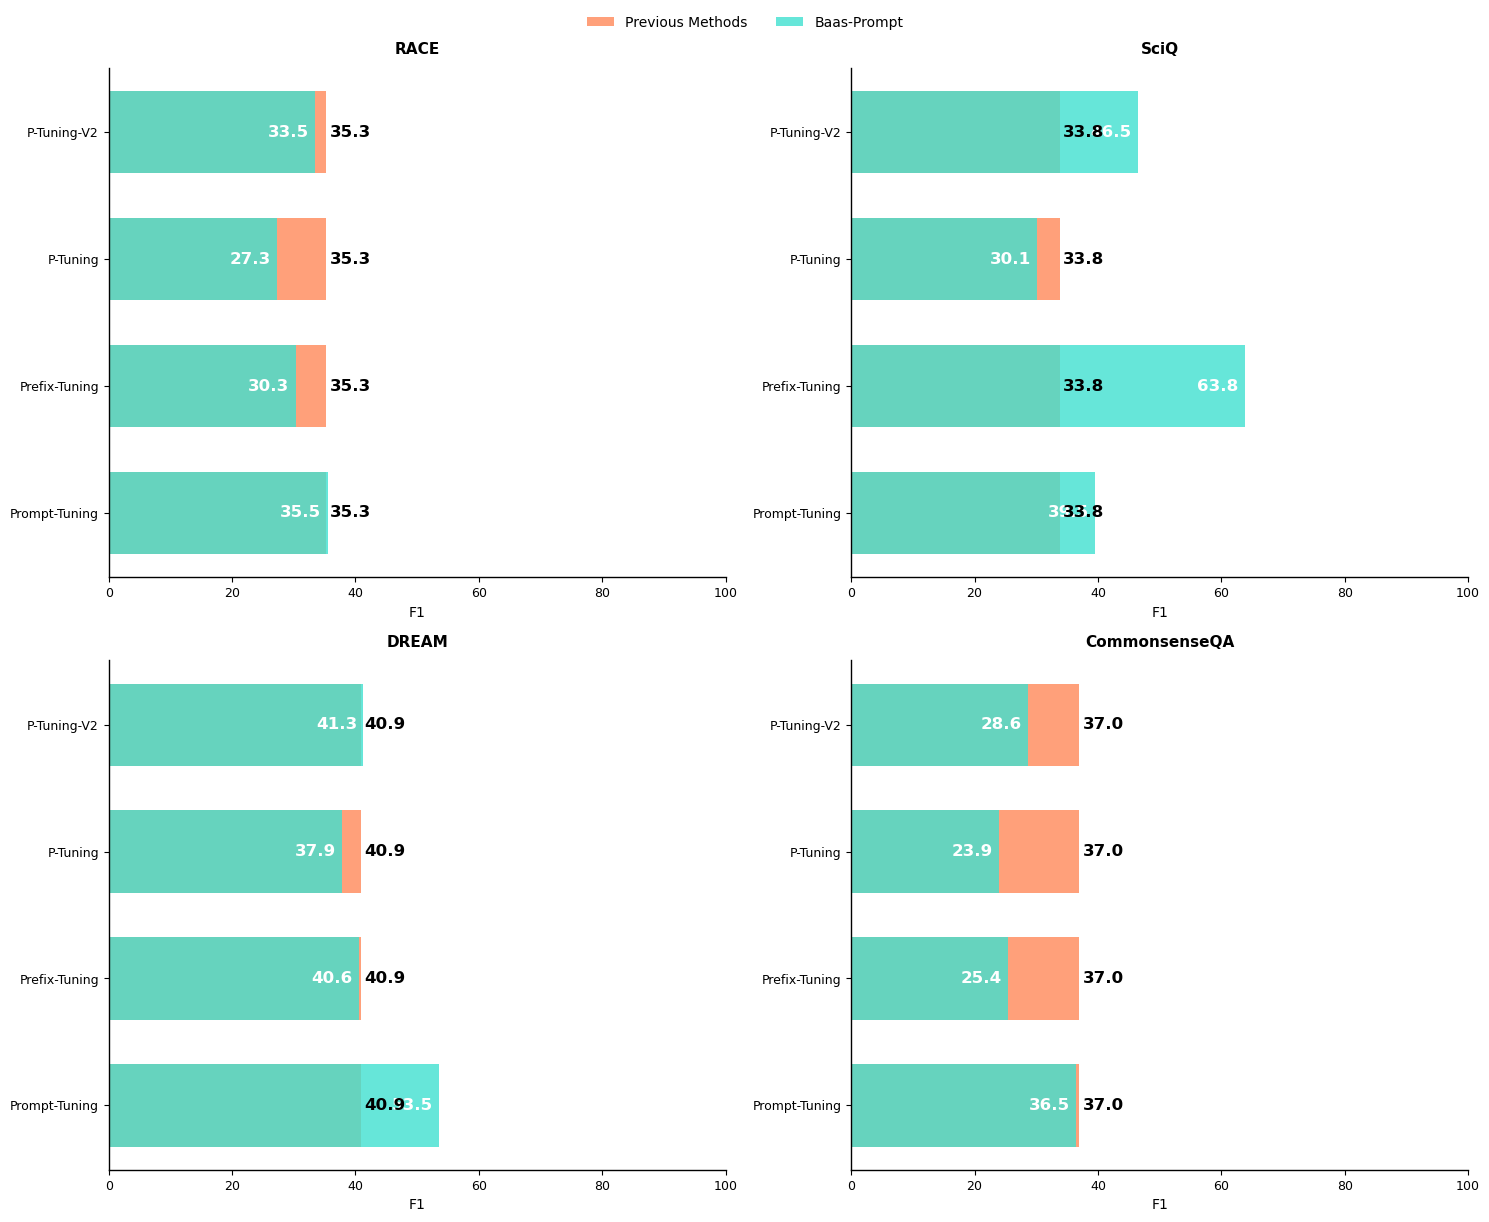

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
# 仅使用 Roberta, Average F1

# 准备数据
race = {
    'Category': ['Prompt-Tuning', 'Prefix-Tuning', 'P-Tuning', 'P-Tuning-V2'],
    'old_methods': [35.5, 30.3, 27.3, 33.5],
    'baas_prompt': [35.3,35.3,35.3,35.3]
}

sciq = {
    'Category': ['Prompt-Tuning', 'Prefix-Tuning', 'P-Tuning', 'P-Tuning-V2'],
    'old_methods': [39.5,63.8,30.1,46.5],
    'baas_prompt': [33.8,33.8, 33.8, 33.8]
}

dream = {
    'Category': ['Prompt-Tuning', 'Prefix-Tuning', 'P-Tuning', 'P-Tuning-V2'],
    'old_methods':  [53.5,40.6,37.9,41.3],
    'baas_prompt':  [40.9, 40.9, 40.9, 40.9]
}

commonsense_qa = {
    'Category': ['Prompt-Tuning', 'Prefix-Tuning', 'P-Tuning', 'P-Tuning-V2'],
    'old_methods': [36.5,25.4,23.9,28.6],
    'baas_prompt': [37.0, 37.0, 37.0, 37.0]
}

# 创建图表
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 设置颜色
colors = ['#40E0D0', '#FFA07A','#FF00FF']  # 青绿色和浅珊瑚色, 洋红色

# 函数用于绘制水平条形图
def plot_horizontal_bars(ax, data, title, xlabel):
    df = pd.DataFrame(data)
    y_pos = range(len(df['Category']))
    
    # 设置条形图的高度
    bar_height = 0.65
    
    # 绘制条形图
    baas_score = df['baas_prompt']
    old_score = df['old_methods']

    ax.barh(y_pos, df['baas_prompt'], 
            # height=bar_height, left=df['old_methods'], color=colors[1], label='Baas-Prompt', alpha=0.5)
            height=bar_height, color=colors[1], label='Baas-Prompt', alpha=1)
    ax.barh(y_pos, df['old_methods'], height=bar_height, color=colors[0], label='Previous Methods',alpha=0.8)


            

    
    # 设置y轴标签
    ax.set_yticks(y_pos)
    ax.set_yticklabels(df['Category'], fontsize=9)
    
    # 设置x轴范围和标签
    ax.set_xlim(0, 100)
    ax.set_xlabel(xlabel, fontsize=10)
    
    # 设置标题
    ax.set_title(title, pad=10, fontsize=11, fontweight='bold')
    
    # 设置刻度
    ax.tick_params(axis='x', labelsize=9)
    
    # 在条形上添加数值标签
    for i, (v1, v2) in enumerate(zip(df['old_methods'], df['baas_prompt'])):
        # 在蓝色条内添加白色数值 计算文本的位置为 (v1 - 1, i)，表示在蓝色条内稍微向左偏移一点
        ax.text(v1-1, i, f'{v1}', va='center', ha='right', fontsize=12, color='white', fontweight='bold')
        # 在橙色条的右侧添加黑色数值
        if abs(v1 - v2) > 0.01:  # 只在值不同时显示第二个数值
            ax.text(v2+0.5, i, f'{v2}', va='center', ha='left', fontsize=12, color='black', fontweight='bold')
    
    # 移除边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    
    # 加粗x轴和y轴
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['left'].set_linewidth(1)
    
    # 移除网格线
    ax.grid(False)

# 设置图表背景为白色
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# 绘制四个子图
plot_horizontal_bars(ax1, race, 'RACE', 'F1')
plot_horizontal_bars(ax2, sciq, 'SciQ', 'F1')
plot_horizontal_bars(ax3, dream, 'DREAM', 'F1')
plot_horizontal_bars(ax4, commonsense_qa, 'CommonsenseQA', 'F1')

# 添加图例
legend = fig.legend(['Previous Methods', 'Baas-Prompt'], 
                   loc='upper center', 
                   bbox_to_anchor=(0.5, 1.02),
                   ncol=2,
                   frameon=False,
                   fontsize=10)

# 调整布局
plt.tight_layout()
plt.savefig('performance_across_tasks.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
# 显示图表
plt.show()